### Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Objective

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1189]:
#Importing required libraries
import numpy as np
import pandas as pd
# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
# For Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

#Libraries for model building
from sklearn.model_selection import train_test_split

# Import library for scaling
from sklearn.preprocessing import MinMaxScaler

# Importing libraries for LogisticRegression - RFE plus manual approach 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor #For checking mulitcolinearity

# For model evaluation
from sklearn import metrics

In [1190]:
# Loading the Leads data
lead_df = pd.read_csv("C:/SHUBHANGI/Machine Learning/Lead+Scoring+Case+Study/Lead Scoring Assignment/Leads.csv")
#Chceck initial rows
lead_df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1191]:
#Check the basic information of data using info()
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

As we can see from the above that there are 37 columns and 9240 rows. Also some columns are having large amount of missing values

### Data Cleaning and EDA

In [1192]:
#check for duplicates
sum(lead_df.duplicated(subset = 'Prospect ID')) == 0

True

No duplicate values in Prospect ID

In [1193]:
#check for duplicates
sum(lead_df.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values in Lead number

From the data dictionary we understand that Prospect ID and Lead No are unique IDs so they are not going to help us in our case study anyways so we will delete these two columns

In [1194]:
lead_df.drop(["Prospect ID","Lead Number"], axis=1, inplace=True)
lead_df.shape

(9240, 35)

##### Now we will also check no of unique values for each column and delete those columns for which only 1 value is there as they are not going to contribute to our analysis 

In [1195]:
lead_df.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

As we can see there are 5 columns where there is only a single unique value, so we will remove these 5 columns

In [1196]:
columns_delete = ["Magazine","Receive More Updates About Our Courses","Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque"]
lead_df.drop(columns_delete,axis=1,inplace= True)
lead_df.shape

(9240, 30)

### Converting 'Select' value to 'null'

Form the data dictionary we understand that there are some columns 'select' value is present which is to be taken as null value. e.g. Select Specialization' which means the customer had not selected this option while filling the form.

In [1197]:
lead_df.Specialization.value_counts(dropna=False)

Select                               1942
NaN                                  1438
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [1198]:
#So initially we will convert all the text based columns to lowercase and then replace the select column by np.nan
lead_df = lead_df.applymap(lambda text:text.lower() if type(text) == str else text)
#Converting 'Select' values to NaN.
lead_df = lead_df.replace('select',np.nan)

In [1199]:
#test check for specialisation column
lead_df.Specialization.value_counts(dropna=False)

NaN                                  3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

### Checking for nulls

In [1200]:
# Now we will check columnwise null values
column_wise_null = round(lead_df.isnull().sum()*100/len(lead_df), 2)
column_wise_null

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

We can see that select values are now replaced by nan

#### As we can see that there are many columns where null value percentage is more than 39%. So we will drop the columns where missing values are more that 35% 

In [1201]:
missing_columns = column_wise_null[column_wise_null > 39].index
# Dropping column with more than 39 percentage of missing values
lead_df.drop(missing_columns, axis=1, inplace=True)
lead_df.shape

(9240, 22)

In [1202]:
# Now we will again check columnwise null values
column_wise_null = round(lead_df.isnull().sum()*100/len(lead_df), 2)
column_wise_null

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement                            0.00
Through Recommendations     

We can see that for 4 columns viz., Country, Speicalization, Occupation and reason for choosing the course there are many missing values and these values are missing at random and we cannot impute these values so  we will analyse each column separately and will take action accordingly

In [1203]:
#checking value counts of Country column

lead_df['Country'].value_counts(dropna=False)

india                   6492
NaN                     2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
france                     6
oman                       6
unknown                    5
germany                    4
south africa               4
nigeria                    4
kuwait                     4
canada                     4
sweden                     3
italy                      2
asia/pacific region        2
china                      2
philippines                2
uganda                     2
netherlands                2
belgium                    2
bangladesh                 2
ghana                      2
kenya                      1
denmark                    1
malaysia                   1
vietnam                    1
switzerland                1
liberia       

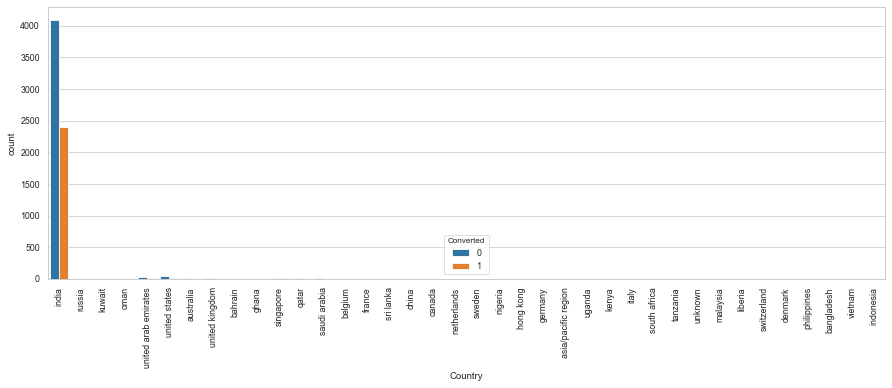

In [1204]:
#plotting spread of Country columnn 
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Country, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()


In [1205]:
# Since India is the most common occurence among the non-missing values we can impute all missing values with India


lead_df['Country'] = lead_df['Country'].replace(np.nan,'india')

In [1206]:
#checking value counts of Country column

lead_df['Country'].value_counts(dropna=False)/len(lead_df)

india                  0.97
united states          0.01
united arab emirates   0.01
singapore              0.00
saudi arabia           0.00
united kingdom         0.00
australia              0.00
qatar                  0.00
hong kong              0.00
bahrain                0.00
oman                   0.00
france                 0.00
unknown                0.00
south africa           0.00
germany                0.00
kuwait                 0.00
canada                 0.00
nigeria                0.00
sweden                 0.00
italy                  0.00
china                  0.00
ghana                  0.00
philippines            0.00
uganda                 0.00
netherlands            0.00
belgium                0.00
bangladesh             0.00
asia/pacific region    0.00
denmark                0.00
kenya                  0.00
switzerland            0.00
malaysia               0.00
vietnam                0.00
liberia                0.00
russia                 0.00
tanzania            

Now we can see that for countries no of unique values are 39 so we will try to reduce the no of these values by grouping it into three categories viz., India, Abroad and Not Entered

In [1207]:
def country_group(country):
    group = ""
    if country == "india":
        group = "india"
    elif country == "Not Entered":
        group = "Not Entered"
    else:
        group = "Abroad"
    return group

lead_df['Country'] =lead_df.apply(lambda x:country_group(x['Country']), axis = 1)
lead_df['Country'].value_counts()

india     8953
Abroad     287
Name: Country, dtype: int64

Country column is highly skewed and will not contribute to further analysis

In [1208]:
#checking value counts of Specialization column

lead_df['Specialization'].value_counts(dropna=False)

NaN                                  3380
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

Lead may not have mentioned specialization because it was not in the list,So we will replace NaN values here with 'Not Specified'

In [1209]:
lead_df['Specialization'].fillna('Not Specified',inplace= True)

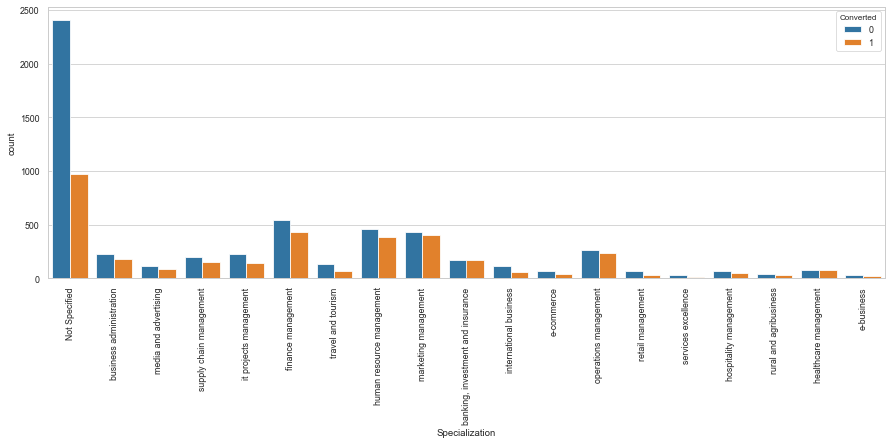

In [1210]:
#plotting spread of Specialization columnn 

plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Since we can see that there are multiple categories and we can cannot use all these categories for analysis, we will try to replace all management category into one category management

In [1211]:
# Combining all management category to one major category 'Management_Specialization'
lead_df['Specialization'] = lead_df['Specialization'].replace(['Finance management','human resource management',
                                                           'marketing management','operations management',
                                                           'it projects management','supply chain management',
                                                    'healthcare management','hospitality management',
                                                           'retail management'] ,'Management_Specializations')  

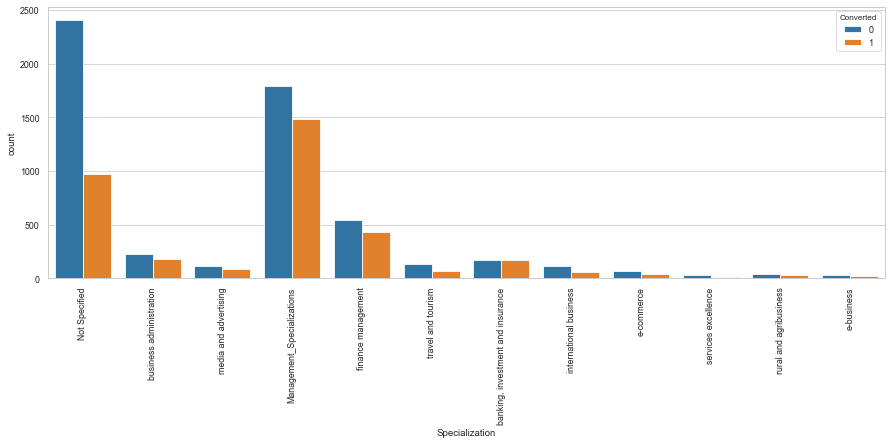

In [1212]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df.Specialization, hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1213]:
#Wchecking value count for current occupation

lead_df['What is your current occupation'].value_counts(dropna=False)

unemployed              5600
NaN                     2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [1214]:
#imputing Nan values with mode "Unemployed"

lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'unemployed')

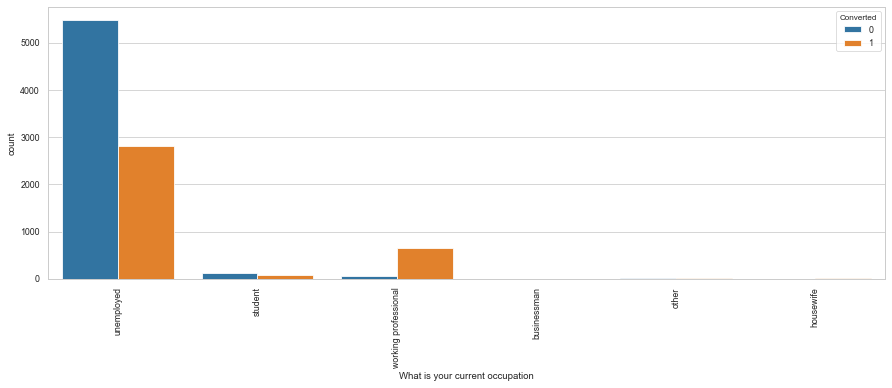

In [1215]:
#visualizing count of 'Occupaton' based on Converted value
plt.figure(figsize=(15,5))
s1=sns.countplot(lead_df['What is your current occupation'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

Here from the above graph we can conclude:
    - Unemployed people are mostly the most approachable one
    - Working Professionals are most likely to be converted and reaching out them will increase the lead score

In [1216]:
#checking value counts for 'What matters most to you in choosing a course'

lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)

better career prospects      6528
NaN                          2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1217]:
#replacing Nan values with Mode "Better Career Prospects"
lead_df['What matters most to you in choosing a course'].fillna('better career prospects',inplace= True)


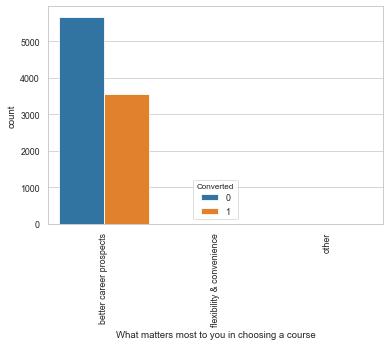

In [1218]:
#visualizing count of 'What matters most to you in choosing a course' based on Converted value

s1=sns.countplot(lead_df['What matters most to you in choosing a course'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

In [1219]:
#checking value counts percentage  of 'What matters most to you in choosing a course'  column

lead_df['What matters most to you in choosing a course'].value_counts(dropna=False)/len(lead_df)

better career prospects     1.00
flexibility & convenience   0.00
other                       0.00
Name: What matters most to you in choosing a course, dtype: float64

As we can see that almost 99 % value of 'What matters most to you in choosing a course' column is 'Better career Prospect', we should actually drop this column as this will not help in further analysis. This column is also highly skewed.

In [1220]:
lead_df.drop("What matters most to you in choosing a course", axis=1, inplace=True)
lead_df.shape

(9240, 21)

As per description of tags column it indicates the status of lead and for our case study point of view this variable will not be available at the start so we will remove this column as well

In [1221]:
lead_df.drop("Tags", axis=1, inplace=True)
lead_df.shape

(9240, 20)

In [1222]:
column_wise_null = round(lead_df.isnull().sum()*100/len(lead_df), 2)
column_wise_null

Lead Origin                              0.00
Lead Source                              0.39
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              1.48
Total Time Spent on Website              0.00
Page Views Per Visit                     1.48
Last Activity                            1.11
Country                                  0.00
Specialization                           0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64

Now we will try to impute 4 columns where there are very less null values 

In [1223]:
lead_df["Lead Source"].value_counts(normalize=True)

google              0.31
direct traffic      0.28
olark chat          0.19
organic search      0.13
reference           0.06
welingak website    0.02
referral sites      0.01
facebook            0.01
bing                0.00
click2call          0.00
press_release       0.00
social media        0.00
live chat           0.00
testone             0.00
pay per click ads   0.00
nc_edm              0.00
welearn             0.00
blog                0.00
youtubechannel      0.00
welearnblog_home    0.00
Name: Lead Source, dtype: float64

In [1224]:
#replacing Nan Values and combining low frequency values
lead_df['Lead Source'] = lead_df['Lead Source'].replace(np.nan,'others')
lead_df['Lead Source'] = lead_df['Lead Source'].replace('facebook','social media')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['bing','click2call','press_release',
                                                     'youtubechannel','welearnblog_home',
                                                     'welearn','blog','pay per click ads',
                                                    'testone','nc_edm'] ,'others')

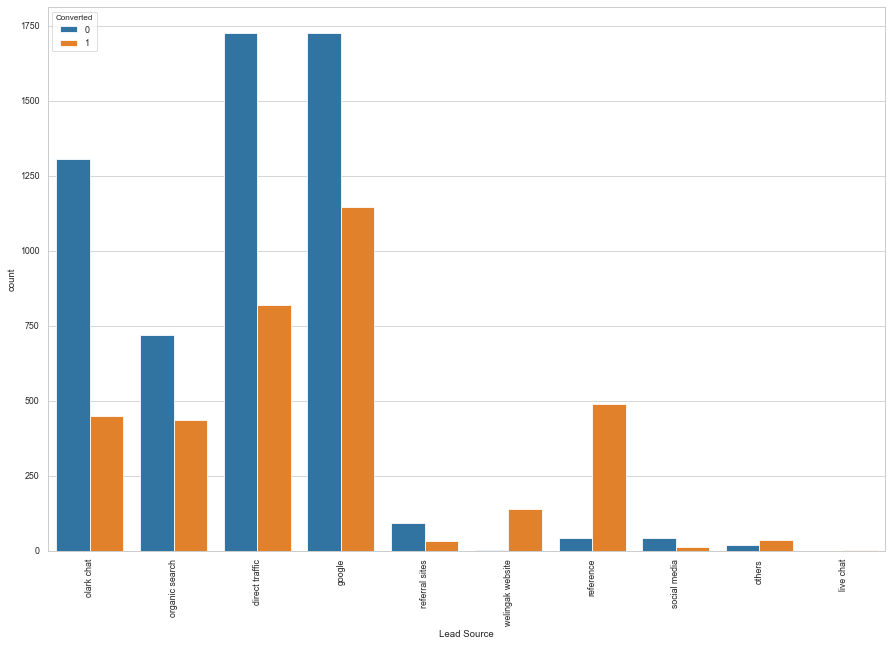

In [1225]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15,10))
s1=sns.countplot(lead_df['Lead Source'], hue=lead_df.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

From the above graph we can conclude that:
    - Maximum number of leads are generated by Google and Direct traffic.
    - Conversion Rate of reference leads and leads through welingak website is high.
    - To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [1226]:
#Ananlysing last Activity column
lead_df["Last Activity"].value_counts(normalize= True)

email opened                   0.38
sms sent                       0.30
olark chat conversation        0.11
page visited on website        0.07
converted to lead              0.05
email bounced                  0.04
email link clicked             0.03
form submitted on website      0.01
unreachable                    0.01
unsubscribed                   0.01
had a phone conversation       0.00
approached upfront             0.00
view in browser link clicked   0.00
email marked spam              0.00
email received                 0.00
resubscribed to emails         0.00
visited booth in tradeshow     0.00
Name: Last Activity, dtype: float64

In [1227]:
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['unreachable','unsubscribed','had a phone conversation', 
                                                        'approached upfront',
                                                        'view in browser link clicked',       
                                                        'email marked spam',                  
                                                        'email received','resubscribed to emails',
                                                         'visited booth in tradeshow'],'others')

In [1228]:
# Last Activity:

lead_df['Last Activity'].value_counts(dropna=False)

email opened                 3437
sms sent                     2745
olark chat conversation       973
page visited on website       640
converted to lead             428
email bounced                 326
email link clicked            267
others                        205
form submitted on website     116
NaN                           103
Name: Last Activity, dtype: int64

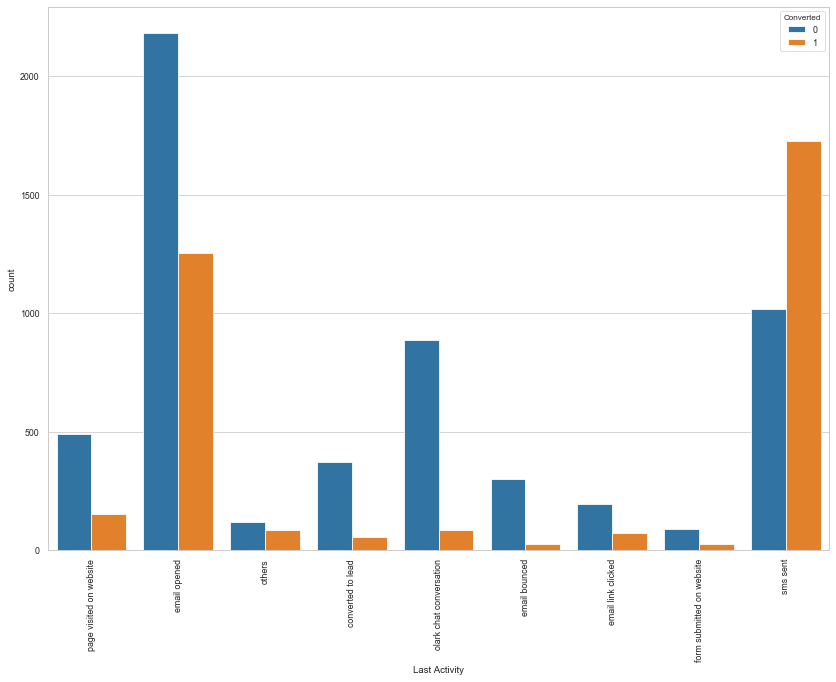

In [1229]:
#visualizing count of Variable based on Converted value

plt.figure(figsize = (14,10))
ax1=sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
plt.show()

From the above graph we can conclude that:
    - Chance of lead to convert are more high when last activity is SMS sent.
    - Chance of lead to convert are very low, when last activity is olark chat conversation.

In [1230]:
#checking value counts of last Notable Activity
lead_df['Last Notable Activity'].value_counts()

modified                        3407
email opened                    2827
sms sent                        2172
page visited on website          318
olark chat conversation          183
email link clicked               173
email bounced                     60
unsubscribed                      47
unreachable                       32
had a phone conversation          14
email marked spam                  2
view in browser link clicked       1
form submitted on website          1
resubscribed to emails             1
approached upfront                 1
email received                     1
Name: Last Notable Activity, dtype: int64

It seems like like 'Last Notable Activity' and 'Last Activity' column is redundant, so we can drop one of these columns

In [1231]:
#Dropping last notable activity column as well 
lead_df.drop("Last Notable Activity", axis=1, inplace=True)
lead_df.shape

(9240, 19)

In [1232]:
#Analysisng TotalVisits column

In [1233]:
lead_df["TotalVisits"].describe()

count   9103.00
mean       3.45
std        4.85
min        0.00
25%        1.00
50%        3.00
75%        5.00
max      251.00
Name: TotalVisits, dtype: float64

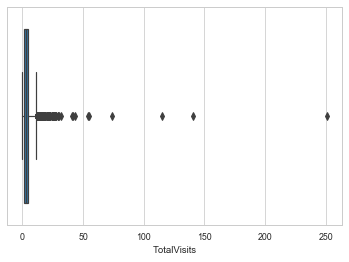

In [1234]:
sns.boxplot(lead_df["TotalVisits"])

In [1235]:
#checking percentile values for "Total Visits"

lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count   9103.00
mean       3.45
std        4.85
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

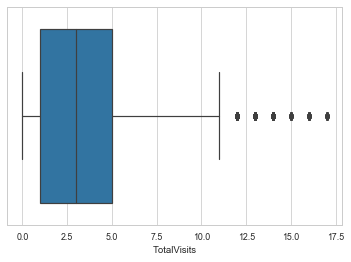

In [1236]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = lead_df.TotalVisits.quantile(0.99)
lead_df = lead_df[(lead_df.TotalVisits <= Q3)]
Q1 = lead_df.TotalVisits.quantile(0.01)
lead_df = lead_df[(lead_df.TotalVisits >= Q1)]
sns.boxplot(lead_df['TotalVisits'])
plt.show()

In [1237]:
lead_df["TotalVisits"].fillna(3,inplace=True)
lead_df["TotalVisits"].describe()

count   9020.00
mean       3.21
std        2.99
min        0.00
25%        1.00
50%        3.00
75%        5.00
max       17.00
Name: TotalVisits, dtype: float64

In [1238]:
lead_df.shape

(9020, 19)

In [1239]:
#Analysisng "Page Views Per Visit" column
lead_df["Page Views Per Visit"].describe()

count   9020.00
mean       2.34
std        2.06
min        0.00
25%        1.00
50%        2.00
75%        3.00
max       16.00
Name: Page Views Per Visit, dtype: float64

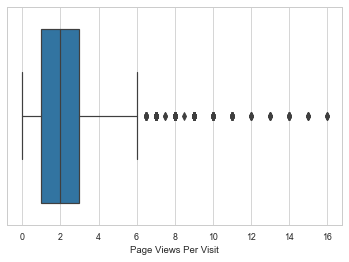

In [1240]:
sns.boxplot(lead_df["Page Views Per Visit"])

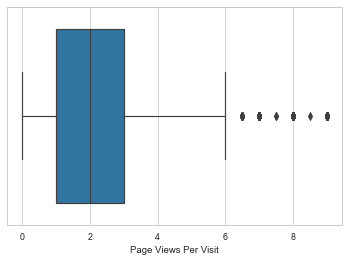

In [1241]:
#Outlier Treatment: Remove top & bottom 1% 

Q3 = lead_df['Page Views Per Visit'].quantile(0.99)
lead_df = lead_df[lead_df['Page Views Per Visit'] <= Q3]
Q1 = lead_df['Page Views Per Visit'].quantile(0.01)
lead_df = lead_df[lead_df['Page Views Per Visit'] >= Q1]
sns.boxplot(lead_df['Page Views Per Visit'])
plt.show()

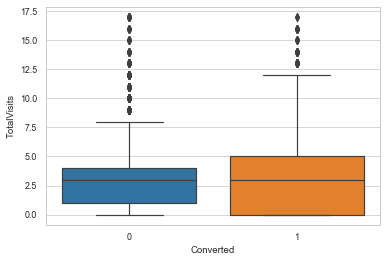

In [1242]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)
plt.show()

From the above graph we can conclude that median for both converted and non conerted is same

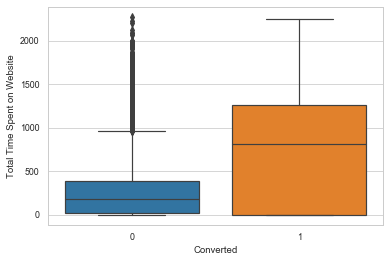

In [1243]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=lead_df.Converted, y=lead_df['Total Time Spent on Website'])
plt.show()

From above box plot we can conclude that Leads spending more time on the website are more likely to be converted.Thus,Website should be made more engaging to make leads spend more time.

In [1244]:
#Check the Null Values in All Columns:
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Lead Origin                              0.00
Lead Source                              0.00
Do Not Email                             0.00
Do Not Call                              0.00
Converted                                0.00
TotalVisits                              0.00
Total Time Spent on Website              0.00
Page Views Per Visit                     0.00
Last Activity                            0.00
Country                                  0.00
Specialization                           0.00
What is your current occupation          0.00
Search                                   0.00
Newspaper Article                        0.00
X Education Forums                       0.00
Newspaper                                0.00
Digital Advertisement                    0.00
Through Recommendations                  0.00
A free copy of Mastering The Interview   0.00
dtype: float64

Now we see that there are no null values in the columns

### Plotting the categorical variables

In [1245]:
#Getting the list of categorical columns
cat_columns = lead_df.select_dtypes(include=['object']).columns
cat_columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

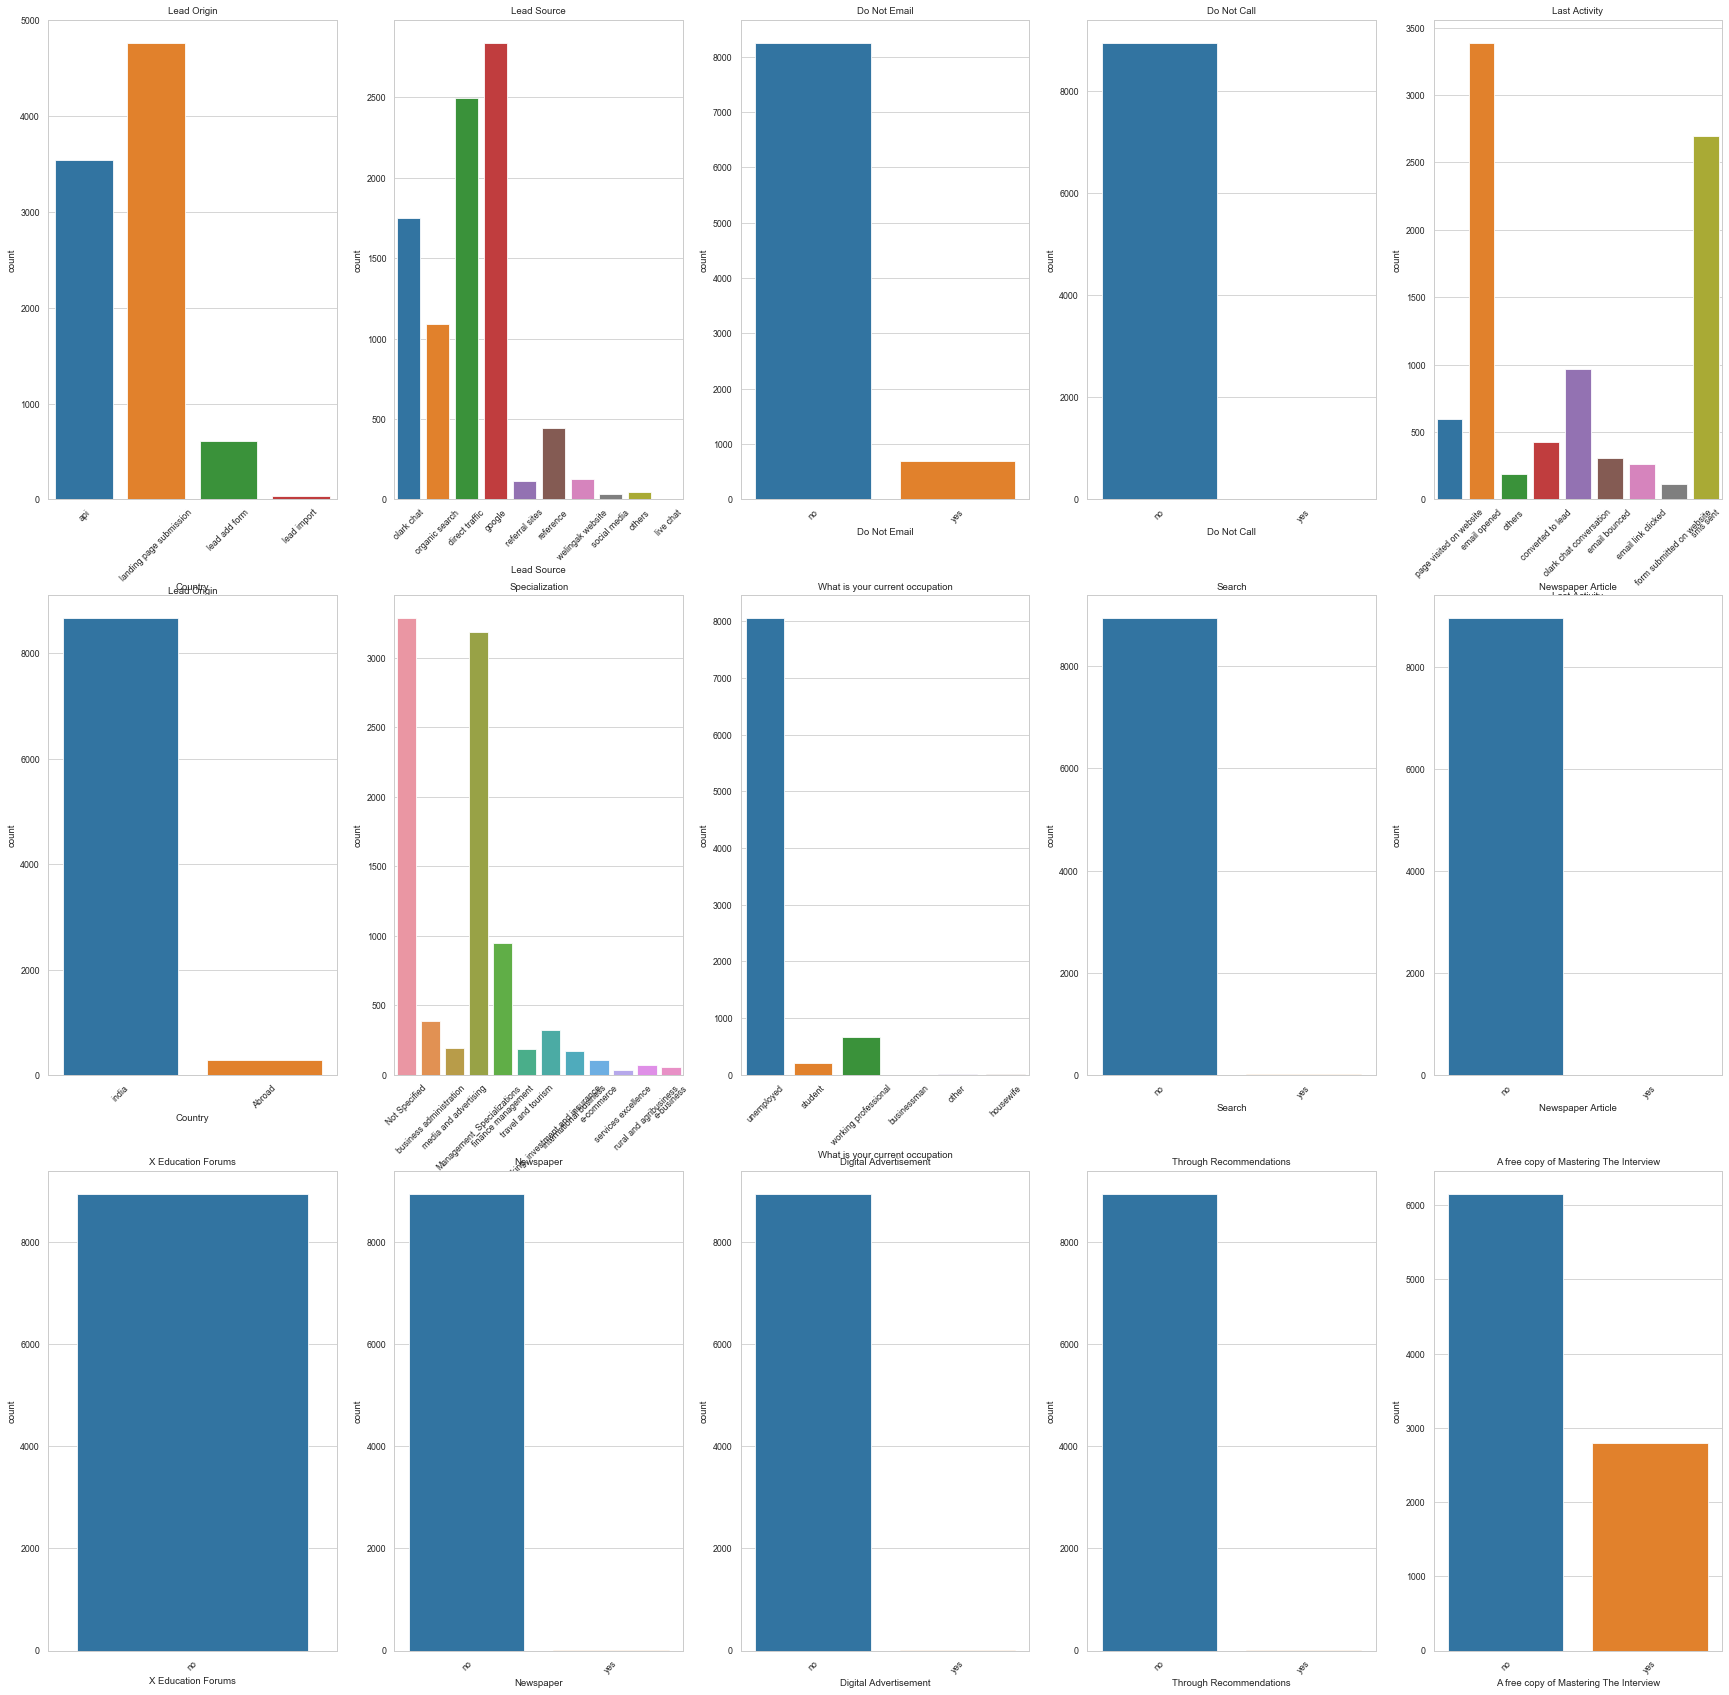

In [1246]:
#Plotting them
plt.figure(figsize=(30,30))
for i in range(15):
    plt.subplot(3,5,i+1)
    sns.countplot(lead_df[cat_columns[i]])
    plt.title(cat_columns[i])
    plt.xticks(rotation=45)

## Numerical Column Analysis

In [1247]:
lead_df['Converted'].value_counts(normalize=True)

0   0.62
1   0.38
Name: Converted, dtype: float64

### We can see that converted is almost 39% of entire data. So we can say that the data is relatively balance

### Checking correlation among numerical variables

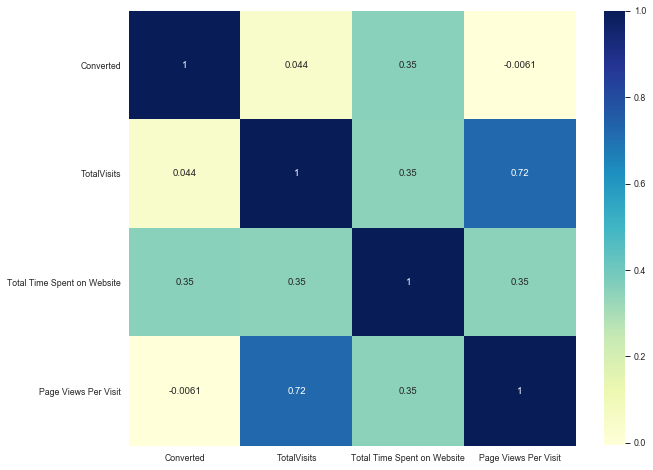

In [1248]:
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(lead_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Now we can see that there is not much corr among the numerical variables

## Dummy Variables

Now we will create dummy variables for all categorical columns 

In [1249]:
dummies = pd.get_dummies(lead_df[cat_columns], drop_first=True)
# Concating the new datafram with lead dataframe along columns
df_concat = pd.concat([lead_df, dummies], axis=1)
df_concat.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Search_yes,Newspaper Article_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
0,api,olark chat,no,no,0,0.00,0,0.00,page visited on website,india,...,0,0,1,0,0,0,0,0,0,0
1,api,organic search,no,no,0,5.00,674,2.50,email opened,india,...,0,0,1,0,0,0,0,0,0,0
2,landing page submission,direct traffic,no,no,1,2.00,1532,2.00,email opened,india,...,0,1,0,0,0,0,0,0,0,1
3,landing page submission,direct traffic,no,no,0,1.00,305,1.00,others,india,...,0,0,1,0,0,0,0,0,0,0
4,landing page submission,google,no,no,1,2.00,1428,1.00,converted to lead,india,...,0,0,1,0,0,0,0,0,0,0


In [1250]:
#Now we will delete original cateogrical column as dummies have already been created. 
df_concat = df_concat.drop(cat_columns,axis=1)
df_concat.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_live chat,Lead Source_olark chat,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Search_yes,Newspaper Article_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
0,0,0.00,0,0.00,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,2.00,1532,2.00,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,1.00,305,1.00,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.00,1428,1.00,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1251]:
Y = df_concat['Converted'] #Keeping target variable in Y
X = df_concat.drop(['Converted'],axis= 1) # Keeping all other independent feature in X
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_live chat,Lead Source_olark chat,Lead Source_organic search,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Search_yes,Newspaper Article_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
0,0.00,0,0.00,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.00,674,2.50,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2.00,1532,2.00,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,1.00,305,1.00,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.00,1428,1.00,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1252]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

## Train-Test Split & Logistic Regression Model Building:

In [1253]:
#Splittng the test train data
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [1254]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6267 entries, 9196 to 5825
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6267 non-null   float64
 1   Total Time Spent on Website                           6267 non-null   int64  
 2   Page Views Per Visit                                  6267 non-null   float64
 3   Lead Origin_landing page submission                   6267 non-null   uint8  
 4   Lead Origin_lead add form                             6267 non-null   uint8  
 5   Lead Origin_lead import                               6267 non-null   uint8  
 6   Lead Source_google                                    6267 non-null   uint8  
 7   Lead Source_live chat                                 6267 non-null   uint8  
 8   Lead Source_olark chat                                6

### Scaling the data

As we are having only 3 numerical column we will scale these 3 columns

In [1255]:
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_live chat,Lead Source_olark chat,Lead Source_organic search,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Search_yes,Newspaper Article_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
9196,0.29,0.66,0.56,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4696,0.18,0.20,0.33,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3274,0.24,0.06,0.22,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2164,0.12,0.17,0.22,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1667,0.24,0.51,0.15,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Creating the Model 

As we have to create a model where in we have to do binary classification of a lead based on data, logistic regression is suitable for such model.
For creating a model we will use a hybird approach wherein first we will find the 20 most significant variables through RFE and then we will use manual approach to remove variables one by one.   

In [1256]:
log_model = LogisticRegression()
#Using RFE for getting 20 most significant variables
rfe = RFE(log_model, 20)
rfe = rfe.fit(X_train, y_train)

# Feature ranking by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_landing page submission', True, 1),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 5),
 ('Lead Source_google', False, 22),
 ('Lead Source_live chat', False, 10),
 ('Lead Source_olark chat', True, 1),
 ('Lead Source_organic search', False, 19),
 ('Lead Source_others', False, 2),
 ('Lead Source_reference', False, 3),
 ('Lead Source_referral sites', False, 16),
 ('Lead Source_social media', False, 25),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_yes', True, 1),
 ('Do Not Call_yes', False, 21),
 ('Last Activity_email bounced', False, 13),
 ('Last Activity_email link clicked', False, 11),
 ('Last Activity_email opened', True, 1),
 ('Last Activity_form submitted on website', False, 24),
 ('Last Activity_olark chat conversation', True, 1),
 ('Last Activity_others', True, 1),
 ('Last Activity_page visited on website', False, 14),

In [1257]:
columns = X_train.columns[rfe.support_]
#Selecting only 20 significant cols for training the stats model
X_train = X_train[columns]

In [1258]:
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6246
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2591.1
Date:                Mon, 07 Sep 2020   Deviance:                       5182.2
Time:                        11:44:07   Pearson chi2:                 6.97e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.7194      1.247     -0.577      0.564      -3.164       1.725
TotalVisits                                              1.5304      0.293      5.225      0.000       0.956       2.104
Total Time Spent on Website                              4.3839      0.166     26.441      0.000       4.059       4.709
Page Views Per Visit                                    -1.0314      0.265     -3.895      0.000      -1.550      -0.512
Lead Origin_landing page submission                     -1.1036      0.129     -8.576      0.000      -1.356      -0.851
Lead Origin_lead add form                                3.6190      0.264     13.700      0.000       3.101       4.137
Lead Source_olark chat                                   1.0545      0.136      7.741      0.000       0.787       1.321
Lead Source_welingak website                             2.8505      1.044      2.731      0.006       0.805       4.896
Do Not Email_yes                                        -1.2866      0.180     -7.163      0.000      -1.639      -0.935
Last Activity_email opened                               0.7418      0.111      6.683      0.000       0.524       0.959
Last Activity_olark chat conversation                   -1.0018      0.196     -5.122      0.000      -1.385      -0.618
Last Activity_others                                     1.4945      0.243      6.139      0.000       1.017       1.972
Last Activity_sms sent                                   1.9953      0.114     17.509      0.000       1.772       2.219
Specialization_Not Specified                            -1.1199      0.125     -8.948      0.000      -1.365      -0.875
What is your current occupation_housewife               21.9088   1.69e+04      0.001      0.999   -3.31e+04    3.31e+04
What is your current occupation_other                   -1.2920      1.444     -0.895      0.371      -4.121       1.537
What is your current occupation_student                 -0.8923      1.263     -0.707      0.480      -3.367       1.582
What is your current occupation_unemployed              -1.2392      1.240     -0.999      0.318      -3.670       1.192
What is your current occupation_working professional     1.4177      1.255      1.130      0.259      -1.042       3.878
Newspaper_yes                                          -24.2606   4.82e+04     -0.001      1.000   -9.45e+04    9.44e+04
Through Recommendations_yes                             21.3515    2.1e+04      0.001      0.999   -4.11e+04    4.11e+04
========================================================================================================================
"""

In [1259]:
# Repeating the procedure for other columns based on higher probability value i.e. > 0.05 
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6247
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2592.6
Date:                Mon, 07 Sep 2020   Deviance:                       5185.2
Time:                        11:44:07   Pearson chi2:                 6.97e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4437      0.937      0.473      0.636      -1.393       2.280
TotalVisits                                              1.5298      0.293      5.224      0.000       0.956       2.104
Total Time Spent on Website                              4.3831      0.166     26.444      0.000       4.058       4.708
Page Views Per Visit                                    -1.0403      0.265     -3.929      0.000      -1.559      -0.521
Lead Origin_landing page submission                     -1.0989      0.129     -8.548      0.000      -1.351      -0.847
Lead Origin_lead add form                                3.6177      0.264     13.697      0.000       3.100       4.135
Lead Source_olark chat                                   1.0519      0.136      7.724      0.000       0.785       1.319
Lead Source_welingak website                             2.8502      1.044      2.731      0.006       0.805       4.896
Do Not Email_yes                                        -1.2871      0.180     -7.167      0.000      -1.639      -0.935
Last Activity_email opened                               0.7419      0.111      6.692      0.000       0.525       0.959
Last Activity_olark chat conversation                   -1.0088      0.196     -5.153      0.000      -1.392      -0.625
Last Activity_others                                     1.4941      0.243      6.139      0.000       1.017       1.971
Last Activity_sms sent                                   1.9947      0.114     17.518      0.000       1.772       2.218
Specialization_Not Specified                            -1.1177      0.125     -8.941      0.000      -1.363      -0.873
What is your current occupation_other                   -2.4530      1.187     -2.067      0.039      -4.779      -0.127
What is your current occupation_student                 -2.0551      0.957     -2.148      0.032      -3.930      -0.180
What is your current occupation_unemployed              -2.4020      0.927     -2.591      0.010      -4.219      -0.585
What is your current occupation_working professional     0.2543      0.947      0.269      0.788      -1.601       2.110
Newspaper_yes                                          -23.2615   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Through Recommendations_yes                             20.3527   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
========================================================================================================================
"""

In [1260]:
# Repeating the procedure for other columns based on higher probability value i.e. > 0.05 
X_train.drop('Newspaper_yes', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6248
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2594.4
Date:                Mon, 07 Sep 2020   Deviance:                       5188.9
Time:                        11:44:08   Pearson chi2:                 6.97e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4503      0.937      0.480      0.631      -1.387       2.287
TotalVisits                                              1.5074      0.292      5.153      0.000       0.934       2.081
Total Time Spent on Website                              4.3727      0.166     26.411      0.000       4.048       4.697
Page Views Per Visit                                    -1.0295      0.265     -3.890      0.000      -1.548      -0.511
Lead Origin_landing page submission                     -1.1009      0.128     -8.568      0.000      -1.353      -0.849
Lead Origin_lead add form                                3.6126      0.264     13.680      0.000       3.095       4.130
Lead Source_olark chat                                   1.0473      0.136      7.695      0.000       0.781       1.314
Lead Source_welingak website                             2.8502      1.044      2.731      0.006       0.805       4.896
Do Not Email_yes                                        -1.2870      0.180     -7.169      0.000      -1.639      -0.935
Last Activity_email opened                               0.7387      0.111      6.667      0.000       0.522       0.956
Last Activity_olark chat conversation                   -1.0095      0.196     -5.159      0.000      -1.393      -0.626
Last Activity_others                                     1.4932      0.243      6.137      0.000       1.016       1.970
Last Activity_sms sent                                   1.9931      0.114     17.514      0.000       1.770       2.216
Specialization_Not Specified                            -1.1181      0.125     -8.947      0.000      -1.363      -0.873
What is your current occupation_other                   -2.4483      1.187     -2.062      0.039      -4.775      -0.122
What is your current occupation_student                 -2.0530      0.957     -2.146      0.032      -3.928      -0.178
What is your current occupation_unemployed              -2.4011      0.927     -2.589      0.010      -4.219      -0.584
What is your current occupation_working professional     0.2553      0.947      0.270      0.787      -1.600       2.111
Through Recommendations_yes                             20.3569   1.27e+04      0.002      0.999   -2.49e+04    2.49e+04
========================================================================================================================
"""

In [1261]:
# Repeating the procedure for other columns based on higher probability value i.e. > 0.05 
X_train.drop('Through Recommendations_yes', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6249
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.6
Date:                Mon, 07 Sep 2020   Deviance:                       5191.3
Time:                        11:44:08   Pearson chi2:                 6.99e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.4443      0.937      0.474      0.635      -1.393       2.281
TotalVisits                                              1.5119      0.292      5.171      0.000       0.939       2.085
Total Time Spent on Website                              4.3749      0.166     26.426      0.000       4.050       4.699
Page Views Per Visit                                    -1.0201      0.264     -3.863      0.000      -1.538      -0.502
Lead Origin_landing page submission                     -1.0993      0.129     -8.554      0.000      -1.351      -0.847
Lead Origin_lead add form                                3.6172      0.264     13.698      0.000       3.100       4.135
Lead Source_olark chat                                   1.0514      0.136      7.727      0.000       0.785       1.318
Lead Source_welingak website                             2.8501      1.044      2.731      0.006       0.805       4.895
Do Not Email_yes                                        -1.2877      0.180     -7.172      0.000      -1.640      -0.936
Last Activity_email opened                               0.7394      0.111      6.675      0.000       0.522       0.957
Last Activity_olark chat conversation                   -1.0102      0.196     -5.161      0.000      -1.394      -0.627
Last Activity_others                                     1.4924      0.243      6.135      0.000       1.016       1.969
Last Activity_sms sent                                   1.9918      0.114     17.505      0.000       1.769       2.215
Specialization_Not Specified                            -1.1169      0.125     -8.936      0.000      -1.362      -0.872
What is your current occupation_other                   -2.4496      1.187     -2.064      0.039      -4.776      -0.123
What is your current occupation_student                 -2.0531      0.957     -2.146      0.032      -3.928      -0.178
What is your current occupation_unemployed              -2.4005      0.927     -2.589      0.010      -4.218      -0.583
What is your current occupation_working professional     0.2734      0.947      0.289      0.773      -1.582       2.129
========================================================================================================================
"""

In [1262]:
# Repeating the procedure for other columns based on higher probability value i.e. > 0.05 
X_train.drop('What is your current occupation_working professional', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6250
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2595.7
Date:                Mon, 07 Sep 2020   Deviance:                       5191.4
Time:                        11:44:08   Pearson chi2:                 6.98e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          0.7056      0.250      2.826      0.005       0.216       1.195
TotalVisits                                    1.5119      0.292      5.171      0.000       0.939       2.085
Total Time Spent on Website                    4.3754      0.166     26.431      0.000       4.051       4.700
Page Views Per Visit                          -1.0204      0.264     -3.864      0.000      -1.538      -0.503
Lead Origin_landing page submission           -1.0992      0.129     -8.552      0.000      -1.351      -0.847
Lead Origin_lead add form                      3.6171      0.264     13.698      0.000       3.100       4.135
Lead Source_olark chat                         1.0514      0.136      7.727      0.000       0.785       1.318
Lead Source_welingak website                   2.8502      1.044      2.731      0.006       0.805       4.896
Do Not Email_yes                              -1.2874      0.180     -7.170      0.000      -1.639      -0.935
Last Activity_email opened                     0.7401      0.111      6.682      0.000       0.523       0.957
Last Activity_olark chat conversation         -1.0109      0.196     -5.163      0.000      -1.395      -0.627
Last Activity_others                           1.4934      0.243      6.141      0.000       1.017       1.970
Last Activity_sms sent                         1.9927      0.114     17.517      0.000       1.770       2.216
Specialization_Not Specified                  -1.1168      0.125     -8.935      0.000      -1.362      -0.872
What is your current occupation_other         -2.7115      0.767     -3.533      0.000      -4.216      -1.207
What is your current occupation_student       -2.3150      0.309     -7.501      0.000      -2.920      -1.710
What is your current occupation_unemployed    -2.6626      0.197    -13.519      0.000      -3.049      -2.277
==============================================================================================================
"""

#### Now we will see the variance inflation factor for checking multicolinearity among the variables.

In [1263]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,What is your current occupation_unemployed,10.17
2,Page Views Per Visit,6.50
3,Lead Origin_landing page submission,5.66
0,TotalVisits,4.78
12,Specialization_Not Specified,4.01
8,Last Activity_email opened,3.06
11,Last Activity_sms sent,2.60
5,Lead Source_olark chat,2.59
1,Total Time Spent on Website,2.18
9,Last Activity_olark chat conversation,1.89


#### As we can see that VIF is on higher side for Lead What is your current occupation_unemployed column. So we will remove the column from the training data set.

In [1264]:
X_train.drop('What is your current occupation_unemployed', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.3
Date:                Mon, 07 Sep 2020   Deviance:                       5456.5
Time:                        11:44:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.6233      0.166     -9.776      0.000      -1.949      -1.298
TotalVisits                                 1.3615      0.285      4.778      0.000       0.803       1.920
Total Time Spent on Website                 4.3950      0.162     27.211      0.000       4.078       4.712
Page Views Per Visit                       -1.0309      0.256     -4.021      0.000      -1.533      -0.528
Lead Origin_landing page submission        -1.1932      0.125     -9.577      0.000      -1.437      -0.949
Lead Origin_lead add form                   3.6953      0.260     14.212      0.000       3.186       4.205
Lead Source_olark chat                      1.0221      0.133      7.668      0.000       0.761       1.283
Lead Source_welingak website                2.7166      1.044      2.603      0.009       0.671       4.762
Do Not Email_yes                           -1.3427      0.174     -7.703      0.000      -1.684      -1.001
Last Activity_email opened                  0.7302      0.107      6.824      0.000       0.521       0.940
Last Activity_olark chat conversation      -1.0271      0.192     -5.352      0.000      -1.403      -0.651
Last Activity_others                        1.5470      0.233      6.631      0.000       1.090       2.004
Last Activity_sms sent                      1.9754      0.110     17.961      0.000       1.760       2.191
Specialization_Not Specified               -1.3828      0.122    -11.332      0.000      -1.622      -1.144
What is your current occupation_other      -0.2723      0.751     -0.363      0.717      -1.744       1.199
What is your current occupation_student     0.2014      0.246      0.818      0.413      -0.281       0.684
===========================================================================================================
"""

In [1265]:
# Repeating the procedure for other columns based on higher probability value i.e. > 0.05 
X_train.drop('What is your current occupation_other', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.3
Date:                Mon, 07 Sep 2020   Deviance:                       5456.7
Time:                        11:44:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.6248      0.166     -9.788      0.000      -1.950      -1.299
TotalVisits                                 1.3599      0.285      4.774      0.000       0.802       1.918
Total Time Spent on Website                 4.3934      0.161     27.214      0.000       4.077       4.710
Page Views Per Visit                       -1.0313      0.256     -4.023      0.000      -1.534      -0.529
Lead Origin_landing page submission        -1.1914      0.124     -9.570      0.000      -1.435      -0.947
Lead Origin_lead add form                   3.6957      0.260     14.214      0.000       3.186       4.205
Lead Source_olark chat                      1.0215      0.133      7.664      0.000       0.760       1.283
Lead Source_welingak website                2.7158      1.044      2.602      0.009       0.670       4.761
Do Not Email_yes                           -1.3438      0.174     -7.711      0.000      -1.685      -1.002
Last Activity_email opened                  0.7301      0.107      6.823      0.000       0.520       0.940
Last Activity_olark chat conversation      -1.0282      0.192     -5.357      0.000      -1.404      -0.652
Last Activity_others                        1.5480      0.233      6.637      0.000       1.091       2.005
Last Activity_sms sent                      1.9760      0.110     17.969      0.000       1.760       2.191
Specialization_Not Specified               -1.3806      0.122    -11.328      0.000      -1.619      -1.142
What is your current occupation_student     0.2021      0.246      0.821      0.411      -0.280       0.685
===========================================================================================================
"""

In [1266]:
# Repeating the procedure for other columns based on higher probability value i.e. > 0.05 
X_train.drop('What is your current occupation_student', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2728.7
Date:                Mon, 07 Sep 2020   Deviance:                       5457.3
Time:                        11:44:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6210      0.166     -9.770      0.000      -1.946      -1.296
TotalVisits                               1.3595      0.285      4.773      0.000       0.801       1.918
Total Time Spent on Website               4.3936      0.161     27.213      0.000       4.077       4.710
Page Views Per Visit                     -1.0341      0.256     -4.035      0.000      -1.536      -0.532
Lead Origin_landing page submission      -1.1890      0.124     -9.554      0.000      -1.433      -0.945
Lead Origin_lead add form                 3.6979      0.260     14.224      0.000       3.188       4.207
Lead Source_olark chat                    1.0232      0.133      7.677      0.000       0.762       1.284
Lead Source_welingak website              2.7111      1.044      2.598      0.009       0.666       4.757
Do Not Email_yes                         -1.3446      0.174     -7.714      0.000      -1.686      -1.003
Last Activity_email opened                0.7302      0.107      6.825      0.000       0.521       0.940
Last Activity_olark chat conversation    -1.0256      0.192     -5.345      0.000      -1.402      -0.650
Last Activity_others                      1.5438      0.233      6.620      0.000       1.087       2.001
Last Activity_sms sent                    1.9729      0.110     17.957      0.000       1.758       2.188
Specialization_Not Specified             -1.3802      0.122    -11.322      0.000      -1.619      -1.141
=========================================================================================================
"""

In [1267]:
# Checking VIF again
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.36
0,TotalVisits,4.72
3,Lead Origin_landing page submission,4.00
8,Last Activity_email opened,2.90
12,Specialization_Not Specified,2.72
11,Last Activity_sms sent,2.54
5,Lead Source_olark chat,2.37
1,Total Time Spent on Website,2.15
9,Last Activity_olark chat conversation,1.85
4,Lead Origin_lead add form,1.60


##### Now we can see that Page Views Per Visit column have high VIF, so we will remove the column

In [1268]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.9
Date:                Mon, 07 Sep 2020   Deviance:                       5473.8
Time:                        11:44:08   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.7624      0.162    -10.859      0.000      -2.080      -1.444
TotalVisits                               0.7683      0.244      3.149      0.002       0.290       1.246
Total Time Spent on Website               4.4016      0.161     27.266      0.000       4.085       4.718
Lead Origin_landing page submission      -1.2281      0.124     -9.928      0.000      -1.471      -0.986
Lead Origin_lead add form                 3.8691      0.257     15.076      0.000       3.366       4.372
Lead Source_olark chat                    1.1796      0.128      9.234      0.000       0.929       1.430
Lead Source_welingak website              2.6937      1.043      2.582      0.010       0.649       4.738
Do Not Email_yes                         -1.3581      0.174     -7.803      0.000      -1.699      -1.017
Last Activity_email opened                0.6832      0.106      6.438      0.000       0.475       0.891
Last Activity_olark chat conversation    -1.0593      0.191     -5.535      0.000      -1.434      -0.684
Last Activity_others                      1.4841      0.233      6.373      0.000       1.028       1.940
Last Activity_sms sent                    1.9120      0.108     17.633      0.000       1.700       2.125
Specialization_Not Specified             -1.3482      0.121    -11.122      0.000      -1.586      -1.111
=========================================================================================================
"""

As we can see the for all the variables the P value is less than 0.05 all the variables can be considered significant.
So we will again check the VIF for checking multicolinearity among the variables

In [1269]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_landing page submission,3.57
0,TotalVisits,2.99
7,Last Activity_email opened,2.77
11,Specialization_Not Specified,2.68
10,Last Activity_sms sent,2.42
4,Lead Source_olark chat,2.26
1,Total Time Spent on Website,2.15
8,Last Activity_olark chat conversation,1.82
3,Lead Origin_lead add form,1.58
5,Lead Source_welingak website,1.33


In [1270]:
X_train.drop('Lead Origin_landing page submission', axis = 1, inplace = True)
X_train_sm = sm.add_constant(X_train)
log_model = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
result = log_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.0
Date:                Mon, 07 Sep 2020   Deviance:                       5576.1
Time:                        11:44:09   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.8331      0.125    -22.756      0.000      -3.077      -2.589
TotalVisits                               0.7548      0.242      3.124      0.002       0.281       1.228
Total Time Spent on Website               4.4747      0.160     27.904      0.000       4.160       4.789
Lead Origin_lead add form                 4.6212      0.245     18.895      0.000       4.142       5.101
Lead Source_olark chat                    1.5815      0.121     13.046      0.000       1.344       1.819
Lead Source_welingak website              2.2571      1.041      2.167      0.030       0.216       4.298
Do Not Email_yes                         -1.4392      0.173     -8.330      0.000      -1.778      -1.101
Last Activity_email opened                0.6686      0.105      6.382      0.000       0.463       0.874
Last Activity_olark chat conversation    -1.0232      0.189     -5.407      0.000      -1.394      -0.652
Last Activity_others                      1.4650      0.232      6.312      0.000       1.010       1.920
Last Activity_sms sent                    1.8659      0.107     17.453      0.000       1.656       2.075
Specialization_Not Specified             -0.5184      0.086     -6.020      0.000      -0.687      -0.350
=========================================================================================================
"""

In [1271]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.55
3,Lead Source_olark chat,2.25
6,Last Activity_email opened,2.21
10,Specialization_Not Specified,2.16
1,Total Time Spent on Website,2.09
9,Last Activity_sms sent,2.00
7,Last Activity_olark chat conversation,1.72
2,Lead Origin_lead add form,1.53
4,Lead Source_welingak website,1.32
5,Do Not Email_yes,1.11


As we can see that all the VIFs values are less than 3 we will finalize this model.

### Making Predictions

In [1272]:
y_train_pred = result.predict(X_train_sm)
y_train_pred

9196   0.90
4696   0.52
3274   0.37
2164   0.03
1667   0.58
       ... 
379    0.09
84     0.39
8313   0.15
7169   0.25
5825   0.97
Length: 6267, dtype: float64

In [1273]:
# Reshaping it to array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.89929499, 0.51651996, 0.36786079, ..., 0.14944824, 0.24949017,
       0.97476661])

In [1274]:
# Creating a dataframe for better visualisation
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.90
1,0,0.52
2,0,0.37
3,0,0.03
4,1,0.58


##### For making prediction we will now have to decide a cutoff probability value. Initially we will take 0.5 as the cutoff probability value and predict i.e. we will say customer will be converted when probability value is more than 0.5 and will not be converted if prob is less than equal to 0.5

In [1275]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,1,0.90,1
1,0,0.52,1
2,0,0.37,0
3,0,0.03,0
4,1,0.58,1


#### Evaluating the model 
For evaluating the model we will see various matrix such as confusion matrix, accuracy , sensistivity, specificity etc

In [1276]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3393,  489],
       [ 776, 1609]], dtype=int64)

In [1277]:
# Model accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7981490346258178

### Accuracy of the model in 79 percent which can be considered good.
However, we know that from business point of view accuracy is always not a good choice for model evaluation

In [1278]:
# Calculating value of true positive
TP = confusion[1,1]
# Calculating value of true negatives
TN = confusion[0,0]
# Calculating value of false positives
FP = confusion[0,1] 
# Calculating value of false negatives
FN = confusion[1,0]

In [1279]:
# Calculating the sensitivity
TP/(TP+FN)

0.6746331236897275

As we can see from the above that sensitivity of the model is very less i.e. our model was able to detect only 67% of total positives with 0.5 prob cut off

In [1280]:
# Calculating the specificity
TN/(TN+FP)

0.8740340030911901

As we can see that specificity of model is good at 87%. However, we are more interested in sensitivity so we will have to revise out prob cutoff.
Before that we will just take a look at ROC curve

In [1281]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1282]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

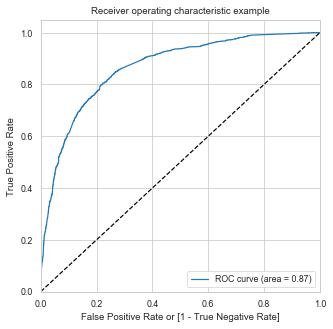

In [1283]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Finding the optimal P value

In [1284]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.90,1,1,1,1,1,1,1,1,1,1,0
1,0,0.52,1,1,1,1,1,1,1,0,0,0,0
2,0,0.37,0,1,1,1,1,0,0,0,0,0,0
3,0,0.03,0,1,0,0,0,0,0,0,0,0,0
4,1,0.58,1,1,1,1,1,1,1,0,0,0,0


In [1285]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci','precision','recall'])
# Making confusion matrix to find values of sensitivity, accuracy and specificity value for diff probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(confusion_mat))
    accuracy = (confusion_mat[0,0]+confusion_mat[1,1])/total
    
    speci = confusion_mat[0,0]/(confusion_mat[0,0]+confusion_mat[0,1])
    sensi = confusion_mat[1,1]/(confusion_mat[1,0]+confusion_mat[1,1])
    precision = confusion_mat[1,1]/(confusion_mat[0,1]+confusion_mat[1,1])
    recall = confusion_mat[1,1]/(confusion_mat[1,0]+confusion_mat[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci,precision,recall]
cutoff_df

,prob,accuracy,sensi,speci,precision,recall
0.00,0.00,0.38,1.00,0.00,0.38,1.00
0.10,0.10,0.57,0.97,0.33,0.47,0.97
0.20,0.20,0.71,0.92,0.58,0.57,0.92
0.30,0.30,0.78,0.84,0.74,0.67,0.84
0.40,0.40,0.79,0.75,0.82,0.72,0.75
0.50,0.50,0.80,0.67,0.87,0.77,0.67
0.60,0.60,0.78,0.56,0.92,0.81,0.56
0.70,0.70,0.76,0.46,0.95,0.85,0.46
0.80,0.80,0.73,0.35,0.97,0.87,0.35
0.90,0.90,0.69,0.20,0.99,0.92,0.20


#### Plotting the accuracy, sensitivity and specificity for difft prob values

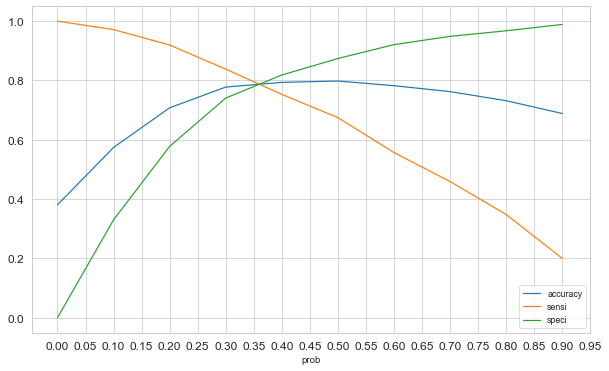

In [1286]:
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()


#### As we can see from the above plot that P=0.34 look to be optimal value for probabilty. So we will not again predict based on new prob  cutoff of 0.33

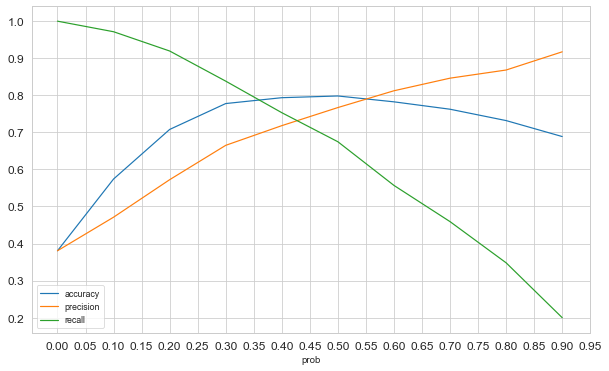

In [1287]:
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','precision','recall'], figsize=(10,6))
plt.xticks(np.arange(0, 1, step=0.05), size = 12)
plt.yticks(size = 12)
plt.show()

In [1288]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.34 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.90,1,1,1,1,1,1,1,1,1,1,0,1
1,0,0.52,1,1,1,1,1,1,1,0,0,0,0,1
2,0,0.37,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.03,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.58,1,1,1,1,1,1,1,0,0,0,0,1


In [1289]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.784585926280517

In [1290]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2989,  893],
       [ 457, 1928]], dtype=int64)

In [1291]:
# Calculating value of true positive
TP = confusion2[1,1]
# Calculating value of true negatives
TN = confusion2[0,0]
# Calculating value of false positives
FP = confusion2[0,1] 
# Calculating the value of false negatives
FN = confusion2[1,0]

In [1292]:
# Calculating the sensitivity
TP/(TP+FN)

0.8083857442348008

In [1293]:
# Calculating the specificity
TN/(TN+FP)

0.7699639361154045

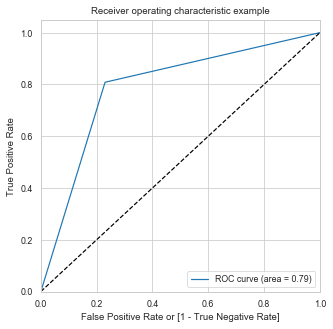

In [1294]:
# checking ROC Curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.80, which is very good. We have the following values for the Train Data:

Accuracy : 78.45%
Sensitivity : 80.83%
Specificity : 76.99%

In [1295]:
# Precision
TP/(TP+FP)

0.6834455866713931

##### As we are looking for a model wherein the model is able to predict the conversion cases in most of the cases so we will try for higher precision value.
##### So we will take 0.35 as cut off so that precision rate of our model will be almost 70% i.e. there is 0.70 probability that student predicted as converted by model will get actually converted

In [1296]:
#Recall
TP/(TP+FN)

0.8083857442348008

In [1297]:
y_train_pred_final.columns

Index([      'Converted', 'Conversion_Prob',       'Predicted',
                     0.0,               0.1,               0.2,
                     0.3,               0.4,               0.5,
                     0.6,               0.7,               0.8,
                     0.9, 'final_predicted'],
      dtype='object')

#### Now we will drop the some column from y_train_pred_final for easy conacating of test and train data in future.

In [1298]:
y_train_pred_final.drop(['Predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis=1,inplace=True)
y_train_pred_final.columns = ['Converted','Conversion_Prob','Predicted']
y_train_pred_final

,Converted,Conversion_Prob,Predicted
0,1,0.90,1
1,0,0.52,1
2,0,0.37,1
3,0,0.03,0
4,1,0.58,1
...,...,...,...
6262,1,0.09,0
6263,1,0.39,1
6264,0,0.15,0
6265,0,0.25,0


### Running the model on Test Data

In [1299]:
#Step 1: Scaling numeric values in test data

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_google,Lead Source_live chat,Lead Source_olark chat,Lead Source_organic search,...,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Search_yes,Newspaper Article_yes,Newspaper_yes,Digital Advertisement_yes,Through Recommendations_yes,A free copy of Mastering The Interview_yes
7681,0.29,0.14,0.28,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
984,0.18,0.08,0.33,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
8135,0.12,0.40,0.22,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6915,0.24,0.06,0.22,1,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2712,0.18,0.11,0.33,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1300]:
#Selecting only those features which are required for our model
X_test = X_test[X_train.columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_lead add form,Lead Source_olark chat,Lead Source_welingak website,Do Not Email_yes,Last Activity_email opened,Last Activity_olark chat conversation,Last Activity_others,Last Activity_sms sent,Specialization_Not Specified
7681,0.29,0.14,0,0,0,0,0,0,0,1,0
984,0.18,0.08,0,0,0,0,0,0,0,1,0
8135,0.12,0.40,0,0,0,1,0,0,0,1,0
6915,0.24,0.06,0,0,0,0,1,0,0,0,0
2712,0.18,0.11,0,0,0,0,1,0,0,0,1


In [1301]:
#Adding constant as per requirement of stats model and predicting values
X_test_sm = sm.add_constant(X_test)
y_test_pred = result.predict(X_test_sm)

In [1302]:
y_test_pred.head()

7681   0.47
984    0.38
8135   0.37
6915   0.15
2712   0.11
dtype: float64

In [1303]:
#Repating the steps as done for train data
# Reshaping it to array
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred

array([0.46688758, 0.38377789, 0.3730013 , ..., 0.18799065, 0.06740908,
       0.46666877])

In [1304]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,0,0.47
1,0,0.38
2,0,0.37
3,0,0.15
4,1,0.11


In [1305]:
# Using o.34 prob cutoff 
y_test_pred_final['Predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.34 else 0)
y_test_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.47,1
1,0,0.38,1
2,0,0.37,1
3,0,0.15,0
4,1,0.11,0


In [1306]:
# Calculating confusion matrix for test data
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.Predicted )
confusion

array([[1303,  373],
       [ 187,  823]], dtype=int64)

In [1307]:
# Model accuracy on test data
acc_score = metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.Predicted)
acc_score

0.7915115413253909

As we can see that model accuracy is at approx 80 percent for test data which is good. Now lets check other parameters

In [1308]:
# Calculating value of true positive
TP = confusion[1,1]
# Calculating value of true negatives
TN = confusion[0,0]
# Calculating value of false positives
FP = confusion[0,1] 
# Calculating value of false negatives
FN = confusion[1,0]

In [1309]:
# Calculating the sensitivity
TP/(TP+FN)

0.8148514851485148

##### As we can see that sensitivity is also good 81.45% for test data

In [1310]:
# Calculating the specificity
TN/(TN+FP)

0.7774463007159904

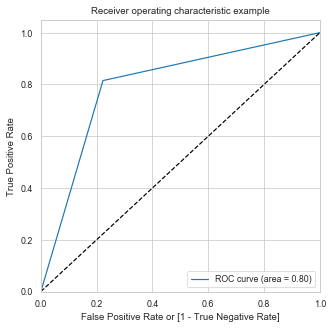

In [1311]:
# checking ROC Curve
draw_roc(y_test_pred_final.Converted, y_test_pred_final.Predicted)

In [1312]:
#Precision
TP/(TP+FP)

0.6881270903010034

#### We can say with 0.69 probability that a student predicted as converted will actually get converted

In [1313]:
#Recall
TP/(TP+FN)

0.8148514851485148

Observation: So as we can see above the model seems to be performing well. The ROC curve has a value of 0.80, which is very good. We have the following values for the Test Data:
    Accuracy : 79.15% 
    Sensitivity : 81.45%
    Specificity : 77.74%

In [1314]:
# Merging test and train data
merged_data = pd.concat([y_train_pred_final,y_test_pred_final],axis = 0)
merged_data

,Converted,Conversion_Prob,Predicted
0,1,0.90,1
1,0,0.52,1
2,0,0.37,1
3,0,0.03,0
4,1,0.58,1
...,...,...,...
2681,1,0.06,0
2682,0,0.06,0
2683,1,0.19,0
2684,0,0.07,0


#### Now as per requirement we will create a lead score column

In [1315]:
merged_data["Lead Score"] = round(merged_data.Conversion_Prob * 100,2)

In [1316]:
merged_data.head()

,Converted,Conversion_Prob,Predicted,Lead Score
0,1,0.90,1,89.93
1,0,0.52,1,51.65
2,0,0.37,1,36.79
3,0,0.03,0,2.90
4,1,0.58,1,57.73


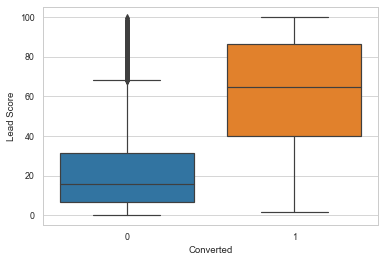

In [1317]:
sns.boxplot(x= merged_data.Converted, y= merged_data["Lead Score"])

### Train Data
Observation:
So as we can see above the model seems to be performing well. The ROC curve has a value of 0.80, which is very good.
We have the following values for the Train Data:
    - Accuracy : 78.45%
    - Sensitivity : 80.83%
    - Specificity : 76.99%

### Test Data
Observation: So as we can see above the model seems to be performing well. The ROC curve has a value of 0.80, which is very good.
We have the following values for the Test Data:
    - Accuracy : 79.15% 
    - Sensitivity : 81.45%
    - Specificity : 77.74%
    
    
    
#### The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

### As we can see from the above wherever lead scores are more than 40 there is a high probility that student will opt for the course. So our model looks decent.

Viewing our model again

In [1318]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6255
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2788.0
Date:                Mon, 07 Sep 2020   Deviance:                       5576.1
Time:                        11:44:16   Pearson chi2:                 6.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.8331      0.125    -22.756      0.000      -3.077      -2.589
TotalVisits                               0.7548      0.242      3.124      0.002       0.281       1.228
Total Time Spent on Website               4.4747      0.160     27.904      0.000       4.160       4.789
Lead Origin_lead add form                 4.6212      0.245     18.895      0.000       4.142       5.101
Lead Source_olark chat                    1.5815      0.121     13.046      0.000       1.344       1.819
Lead Source_welingak website              2.2571      1.041      2.167      0.030       0.216       4.298
Do Not Email_yes                         -1.4392      0.173     -8.330      0.000      -1.778      -1.101
Last Activity_email opened                0.6686      0.105      6.382      0.000       0.463       0.874
Last Activity_olark chat conversation    -1.0232      0.189     -5.407      0.000      -1.394      -0.652
Last Activity_others                      1.4650      0.232      6.312      0.000       1.010       1.920
Last Activity_sms sent                    1.8659      0.107     17.453      0.000       1.656       2.075
Specialization_Not Specified             -0.5184      0.086     -6.020      0.000      -0.687      -0.350
=========================================================================================================
"""

### Conclusion:

1.	If Lead Origin is add form then probability of lead getting converted increases.
2.	The students spending more time on the website have the higher chances of being converted.
3.	If Lead source is welingak Website and olark chat, then probability of conversion is high.
4.	The students visiting the platform more no of times have the higher chances of being converted.
5.	If last activity is email opened, that means lead have shown some interest and is more likely to be converted.
6.	If the specialization is not specified then chances of conversion to Lead become very low but from EDA we found out that Working professionals are more likely to join the course so company can create some campaign for working professionals.
7.	Those candidate who are opting out of email service are less likely to be converted
